                                          **set up section**

In [232]:
#set up & Import 
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
from matplotlib import style 
style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import sklearn # scikit-learn kutubxonasi
import seaborn as sns # statistical graphics
import plotly.express as px # Dashboard

# Crisis 1:  Loneliness

* Reddit users (loneliness & dating) dataset

In [233]:
# step 1
loneliness_variable = 'Downloads/foreveralone.csv' #  to understand the intimacy factor in the equation
lonely = pd.read_csv(loneliness_variable)
lonely.head(4)

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym


In [234]:
# step 2
nRowsRead
nRow, nCol = lonely.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 469 rows and 19 columns


In [235]:
# step 3 
lonely.isnull().sum()

time                      0
gender                    0
sexuallity                0
age                       0
income                    0
race                      0
bodyweight                0
virgin                    0
prostitution_legal        0
pay_for_sex               0
friends                   0
social_fear               0
depressed                 0
what_help_from_others     0
attempt_suicide           0
employment                0
job_title                12
edu_level                 0
improve_yourself_how      0
dtype: int64

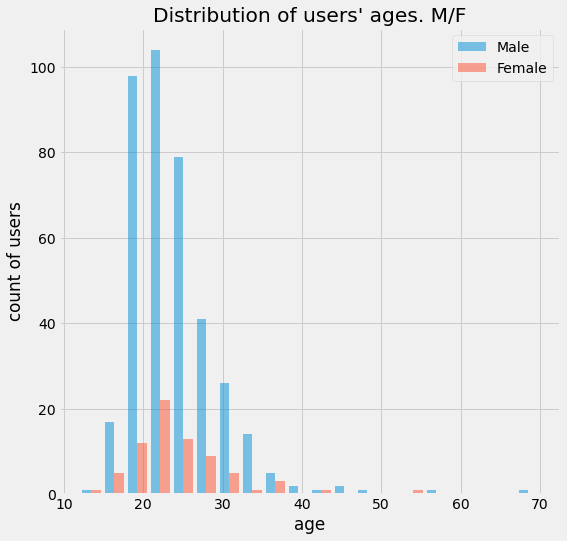

In [236]:
# filtering by gender
male_data = lonely[lonely.gender == 'Male']
female_data = lonely[lonely.gender == 'Female']

plt.figure(figsize=(8, 8))
plt.hist([male_data.age, female_data.age] , alpha=0.5, bins=20, label=['Male', 'Female'])
plt.legend(loc='upper right')

plt.title("Distribution of users' ages. M/F")
plt.ylabel('count of users')
plt.xlabel('age');
plt.show()

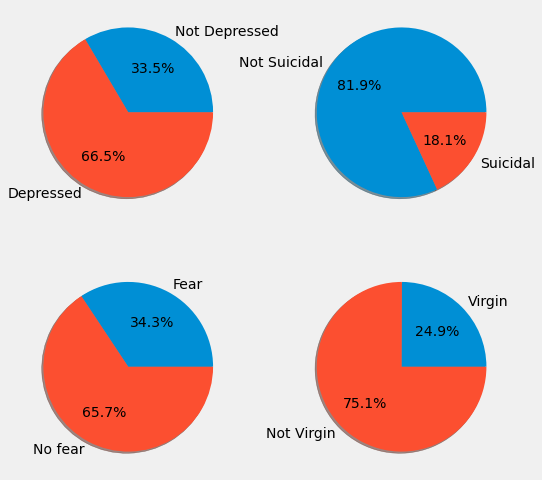

In [237]:
# depressed?
from matplotlib.gridspec import GridSpec

by_depression = lonely.groupby('depressed').size()
by_suicidal = lonely.groupby('attempt_suicide').size()
by_social = lonely.groupby('social_fear').size()
by_virgin = lonely.groupby('virgin').size()

plt.figure(figsize=(8, 8))
the_grid = GridSpec(2, 2)

# plot 1
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(by_depression, labels=['Not Depressed', 'Depressed'], autopct='%1.1f%%', shadow=True)

# plot 2
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(by_suicidal, labels=['Not Suicidal', 'Suicidal'], autopct='%1.1f%%', shadow=True)

# plot 3
plt.subplot(the_grid[1, 0], aspect=1)
plt.pie(by_social, labels=['Fear', 'No fear'], autopct='%1.1f%%', shadow=True)

# plot 4
plt.subplot(the_grid[1, 1], aspect=1)
plt.pie(by_virgin, labels=['Virgin', 'Not Virgin'], autopct='%1.1f%%', shadow=True)
plt.show()


*= Depression had a lot of question marks

------------------------------------------------------------------------------------------------------------------------

# Crisis 2 : Distrust

 Under this section we gonna discover a data for one factor; **Housing**

In [238]:
# step 1
housing_variable ='Downloads/USA Housing/USA_Housing.csv'
housing = pd.read_csv(housing_variable)
housing.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [239]:
# step 2
nRowsRead
nRow, nCol = housing.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 5000 rows and 7 columns


In [240]:
# step 3 
housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [241]:
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


{'whiskers': [<matplotlib.lines.Line2D at 0x2c21eaae430>,
 'caps': [<matplotlib.lines.Line2D at 0x2c21eaae9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c21eaae160>],
 'medians': [<matplotlib.lines.Line2D at 0x2c21eaaef70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c21eabc280>],
 'means': []}

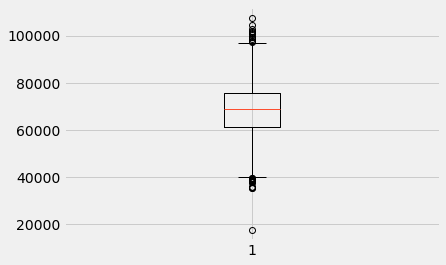

In [242]:
plt.boxplot(housing['Avg. Area Income'])
# not representitive

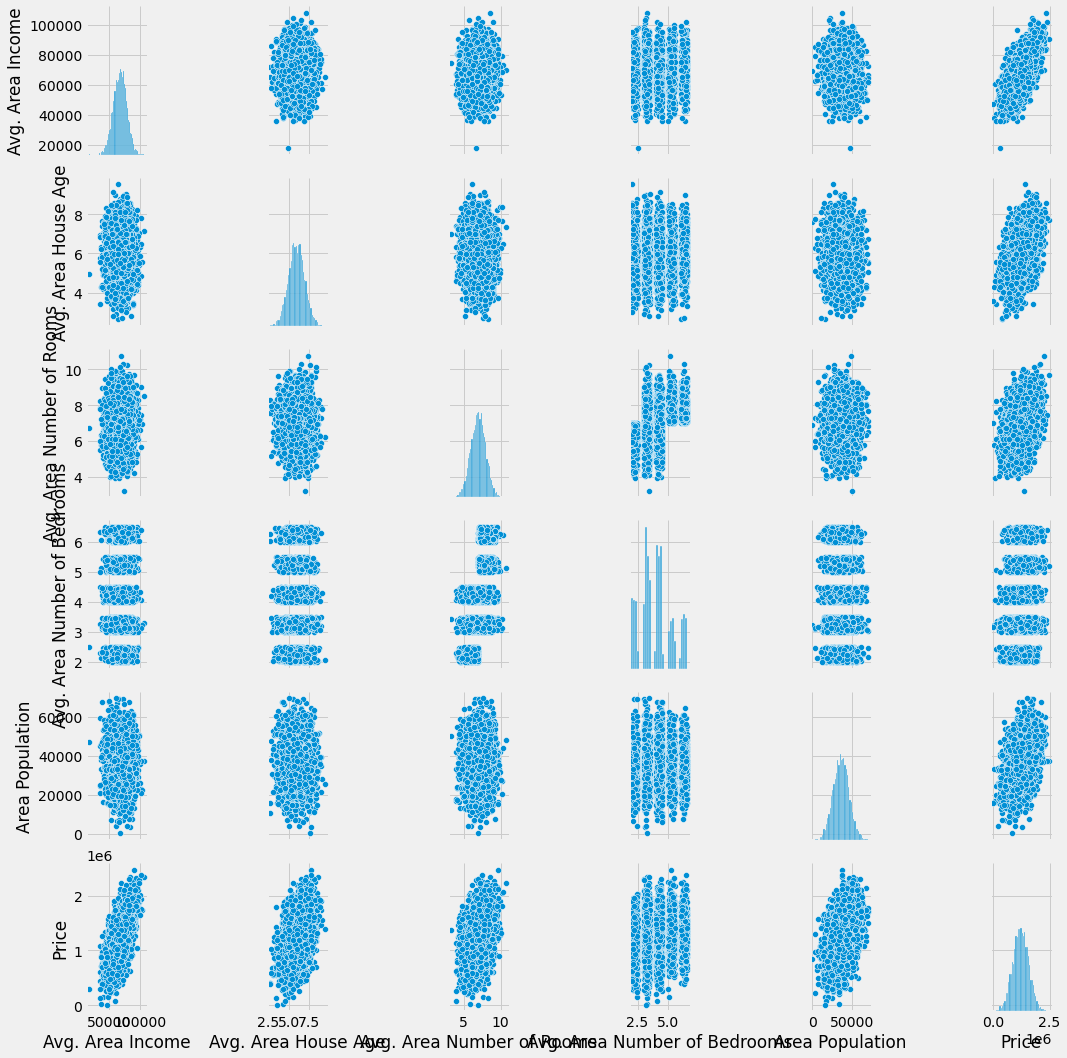

In [245]:
sns.pairplot(housing)
# trying another one 

In [246]:
# no time, let's go deeper 
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [247]:
x=housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=housing['Price']


In [248]:
# Linear Regression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [249]:
pred=lr.predict(x_test)
len(pred)
len(y_test)

1650

C:\Users\Omars\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

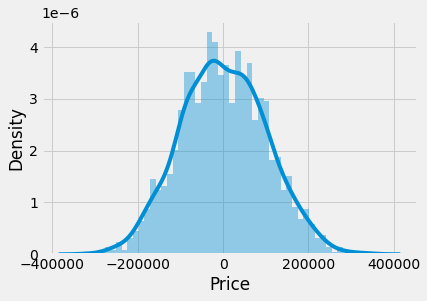

In [250]:
sns.distplot((y_test-pred),bins=50)

In [251]:
z=housing[['Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]
n=housing['Avg. Area Income']

In [252]:
z_train,z_test,n_train,n_test=train_test_split(z,n,test_size=0.33, random_state=42)
lr.fit(z_train,n_train)

LinearRegression()

In [253]:
pred=lr.predict(z_test)
len(pred)
len(n_test)

1650

C:\Users\Omars\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg. Area Income', ylabel='Density'>

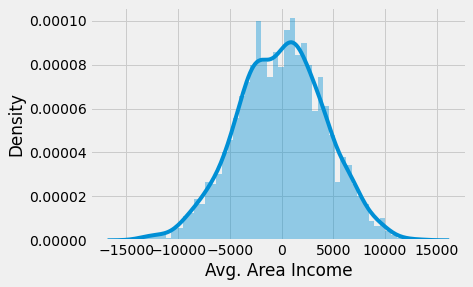

In [254]:
sns.distplot((n_test-pred),bins=50)

***= Area Income / Prices = 2.5% 

------------------------------------------------------------------------------------------------------------------------

# Crisis 3 : Meaning 

For this crisis will just verifey the **Suicide rates** case 

In [255]:
# step 1 
suicide_variable = 'Downloads\Suicide Rates Overview 1985 to 2016/suicide_rates.csv'
suicide = pd.read_csv(suicide_variable)
suicide.head(7)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent


In [256]:
# step 2
nRowsRead
nRow, nCol = suicide.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 27820 rows and 12 columns


In [257]:
# step 3 
suicide.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [258]:
suicide.describe()
# not that much useful

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [259]:
# suicide.filter(like='age').head()   ---> Faliure hit
suicide['age'].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [260]:
# let's treat the null values and evaluate its impact
suicide["HDI for year"].isnull()
# 69% 

0         True
1         True
2         True
3         True
4         True
         ...  
27815    False
27816    False
27817    False
27818    False
27819    False
Name: HDI for year, Length: 27820, dtype: bool

In [262]:
print(suicide['HDI for year'].value_counts(dropna=False))

NaN      19456
0.713       84
0.772       84
0.888       84
0.761       72
         ...  
0.686       12
0.894       12
0.893       12
0.696       12
0.675       12
Name: HDI for year, Length: 306, dtype: int64


In [263]:
suicide.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita"}, inplace=True)
print(suicide.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')


C:\Users\Omars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Omars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


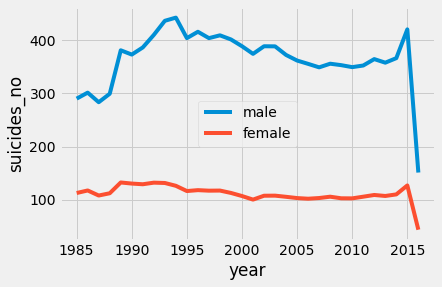

In [264]:
suicide_men = suicide[suicide.sex == "male"]
suicide_women = suicide[suicide.sex == "female"]
sns.lineplot(suicide_men.year, suicide.suicides_no, ci = None)
sns.lineplot(suicide_women.year, suicide.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()

In [270]:
suicide_suino = suicide.groupby(["country","year"])["suicides_no"].sum()
suicide_sum = suicide_suino.sort_index(ascending=True)[:] * 100

suicide_pop = suicide.groupby(["country","year"]).population.sum()
suicide_pop_sum = suicide_pop.sort_index(ascending=False)[:]

suicide_total = suicide_sum / suicide_pop_sum
suicide_total.head(9)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
dtype: float64

In [271]:
country_dict={}
for country in suicide_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = suicide_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

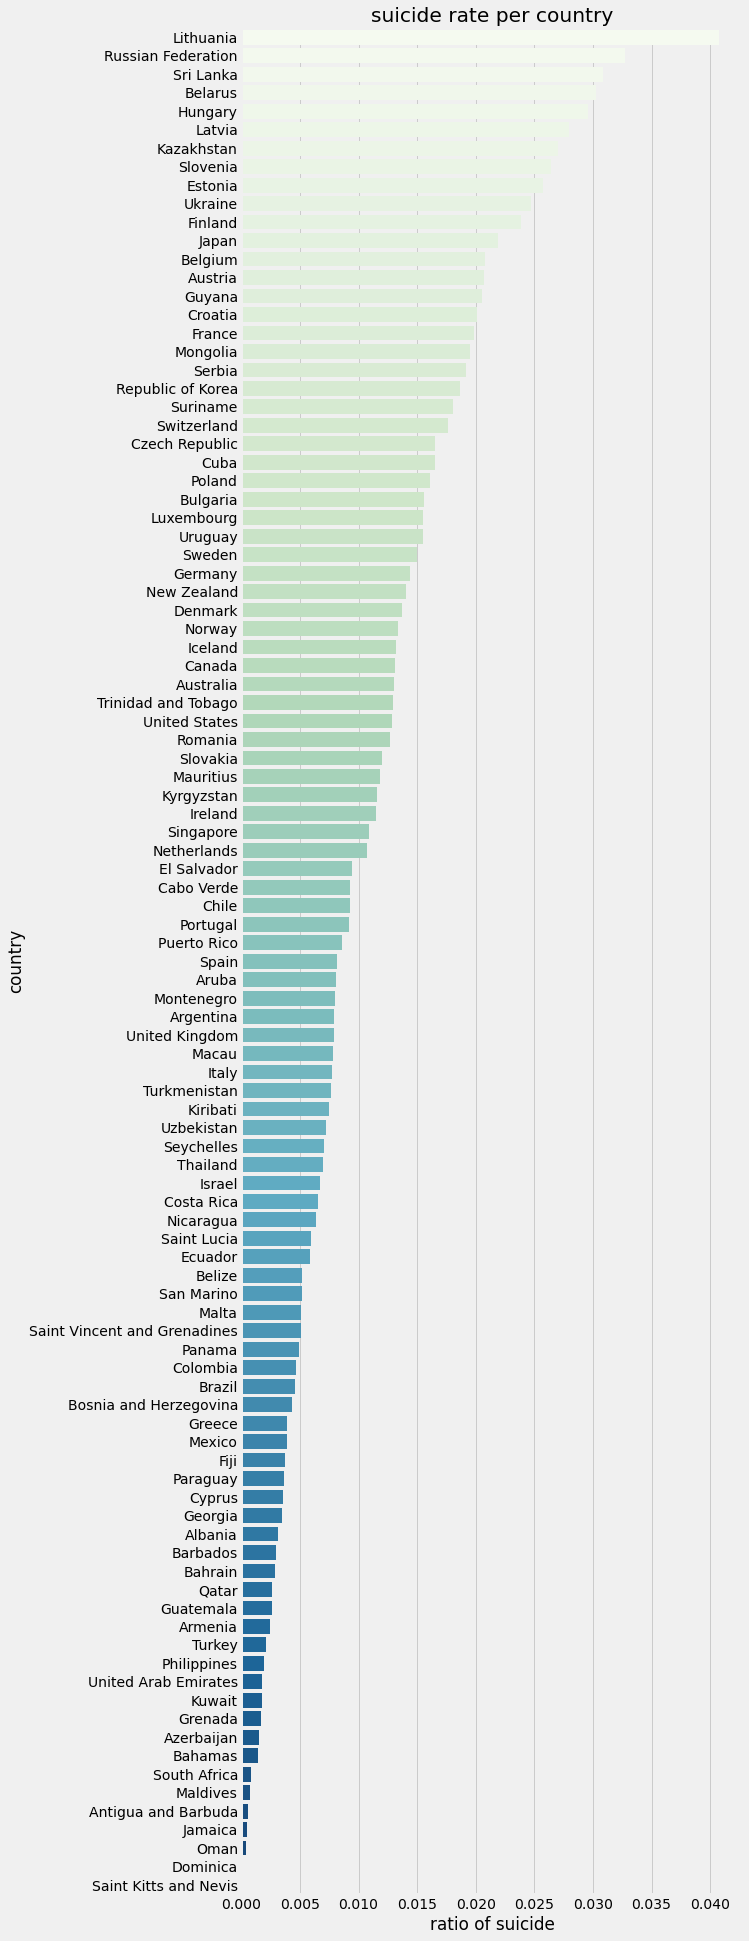

In [272]:
plt.figure(figsize=(8,32))
sns.barplot(x=country_suicide[:],y=country_list[:], palette="GnBu")
plt.xlabel("ratio of suicide")
plt.ylabel("country")
plt.title("suicide rate per country")
plt.show()

In [285]:
# Correlation matrix
def plotCorrelationMatrix(suicide, graphWidth):
    suicide = suicide.dropna('columns') # drop columns with NaN
    suicide = suicide[[col for col in suicide if suicide[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if suicide.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({suicide.shape[1]}) is less than 2')
        return
    corr = suicide.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {suicide}', fontsize=15)
    plt.show()

C:\Users\Omars\AppData\Local\Temp\ipykernel_8976\785107346.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  suicide = suicide.dropna('columns') # drop columns with NaN
C:\Users\Omars\AppData\Local\Temp\ipykernel_8976\785107346.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(corrMat)


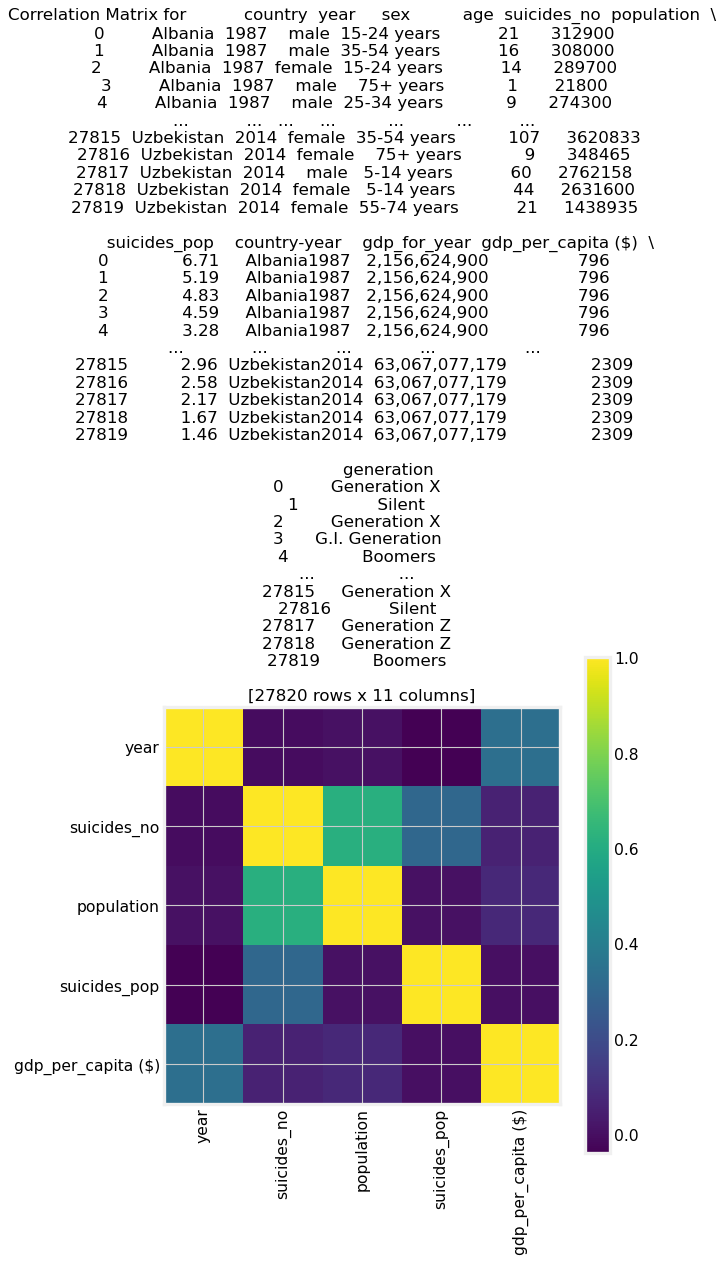

In [286]:
plotCorrelationMatrix(suicide, 8)

In [277]:
# Scatter and density plots
def plotScatterMatrix(suicide, plotSize, textSize):
    suicide = suicide.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to suicide being singular
    suicide = suicide.dropna('columns')
    suicide = suicide[[col for col in suicide if suicide[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(suicide)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    suicide = suicide[columnNames]
    ax = pd.plotting.scatter_matrix(suicide, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = suicide.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
plotScatterMatrix(suicide, 8, 0 )
# Another faliure

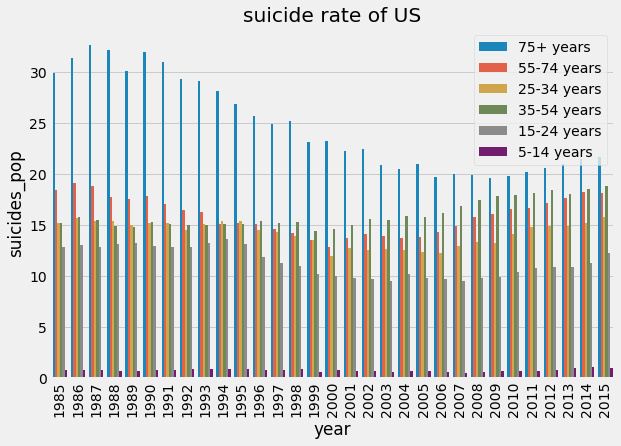

In [282]:
plt.figure(figsize = (9,6))
sns.barplot(x="year", y="suicides_pop", hue="age",
            ci = None, data = (suicide[suicide["country"] == "United States"]) )
plt.xticks(rotation = 90)
plt.title("suicide rate of US" )
plt.legend()    
plt.show()

------------------------------------------------------------------------------------------------------------------------

# Dashboard

In [ ]:
pip install jupyter-dash

In [ ]:
from dash import Dash, dcc, html, Input, Output

app = Dash(__name__)

app.layout = html.Div([
    html.H6("Change the value in the text box to see callbacks in action!"),
    html.Div([
        "Input: ",
        dcc.Input(id='my-input', value='initial value', type='text')
    ]),
    html.Br(),
    html.Div(id='my-output'),

])


@app.callback(
    Output(component_id='my-output', component_property='children'),
    Input(component_id='my-input', component_property='value')
)
def update_output_div(input_value):
    return f'Output: {input_value}'


if __name__ == '__main__':
    app.run_server(debug=True)
